**Route Analysis:**

Features: Route, Sectors_Scheduled
Research Questions:
What are the most popular routes based on the number of scheduled sectors?
How does the distribution of scheduled sectors vary across different routes and airlines?

**Operational Efficiency:**

Features: Airline, Departures_On_Time, Arrivals_On_Time, Cancellations
Research Questions:
Do certain airlines consistently achieve higher rates of on-time departures and arrivals?
What factors contribute to variations in cancellation rates across airlines?

**Delay Analysis:**

Features: Airline, Departures_Delayed, Arrivals_Delayed
Research Questions:
What are the main factors contributing to delays in departures and arrivals?
Are there specific airlines or routes that experience more delays than others?

**Trend Analysis:**

Features: Month, Year, Sectors_Scheduled, Sectors_Flown, Cancellations, Departures_Delayed, Arrivals_Delayed
Research Questions:
How have the number of scheduled sectors and sectors flown changed over the years?
Are there any noticeable trends or patterns in cancellations, delays, and on-time performance over time?

**Comparative Analysis:**

Features: Route, Airline, Departures_On_Time, Arrivals_On_Time, Cancellations
Research Questions:
How does the on-time performance of different airlines compare across similar routes?
Are there significant differences in cancellation rates between low-cost and full-service carriers?

**Impact of Month/Season:**

Features: Month, Sectors_Scheduled, Sectors_Flown, Cancellations, Departures_Delayed, Arrivals_Delayed
Research Questions:
How does air travel demand vary by month, and how does this impact operational metrics?
Are there specific months or seasons associated with higher rates of cancellations or delays?

**Predictive Modeling:**

Features: Route, Airline, Month, Sectors_Scheduled, Departures_On_Time, Arrivals_On_Time, Cancellations, Departures_Delayed, Arrivals_Delayed
Research Questions:
Can we predict the likelihood of delays or cancellations based on historical data and other factors such as airline, route, and month?
What features are the most influential predictors of on-time performance or operational disruptions?
These specific feature requirements can help in structuring your analysis and formulating research questions that address various aspects of airline operations and performance.






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("otp_time_series_web.csv")# adding column name to the DF
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155.0,0.0,123.0,120.0,32.0,35.0,2004.0,1.0
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75.0,0.0,72.0,72.0,3.0,3.0,2004.0,1.0
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40.0,0.0,36.0,35.0,4.0,5.0,2004.0,1.0
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548.0,2.0,478.0,487.0,70.0,61.0,2004.0,1.0
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191.0,0.0,169.0,168.0,22.0,23.0,2004.0,1.0


***DATA CLEANING***

In [5]:
df.isnull().sum()

Route                   0
Departing_Port          0
Arriving_Port           0
Airline                 0
Month                   0
Sectors_Scheduled       1
Sectors_Flown           1
Cancellations         317
Departures_On_Time      1
Arrivals_On_Time        1
Departures_Delayed      6
Arrivals_Delayed        1
Year                    1
Month_Num               1
dtype: int64

In [6]:
df.dropna( inplace= True)

In [9]:
df_1 = df.sample(frac=0.25, random_state=42)

# Print the shape of the original and reduced data to confirm the reduction
print("Original Data Shape:", df.shape)
print("Reduced Data Shape:", df_1.shape)

df_1.head()

Original Data Shape: (86152, 14)
Reduced Data Shape: (21538, 14)


,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
79478,Melbourne-Launceston,Melbourne,Launceston,All Airlines,May-19,308.0,305.0,3.0,265.0,259.0,40.0,46.0,2019.0,5.0
60008,Brisbane-Canberra,Brisbane,Canberra,Virgin Australia,May-16,98.0,98.0,0.0,88.0,88.0,10.0,10.0,2016.0,5.0
77189,Melbourne-Mildura,Melbourne,Mildura,Virgin Australia,Jan-19,31.0,31.0,0.0,28.0,28.0,3.0,3.0,2019.0,1.0
56265,Cairns-Melbourne,Cairns,Melbourne,Tigerair Australia,Oct-15,41.0,41.0,0.0,34.0,32.0,7.0,9.0,2015.0,10.0
48697,Brisbane-Mount Isa,Brisbane,Mount Isa,Virgin Australia,Jul-14,23.0,23.0,0.0,22.0,20.0,1.0,3.0,2014.0,7.0


In [10]:
filtered=df_1[df_1['Airline']!='All Airlines']

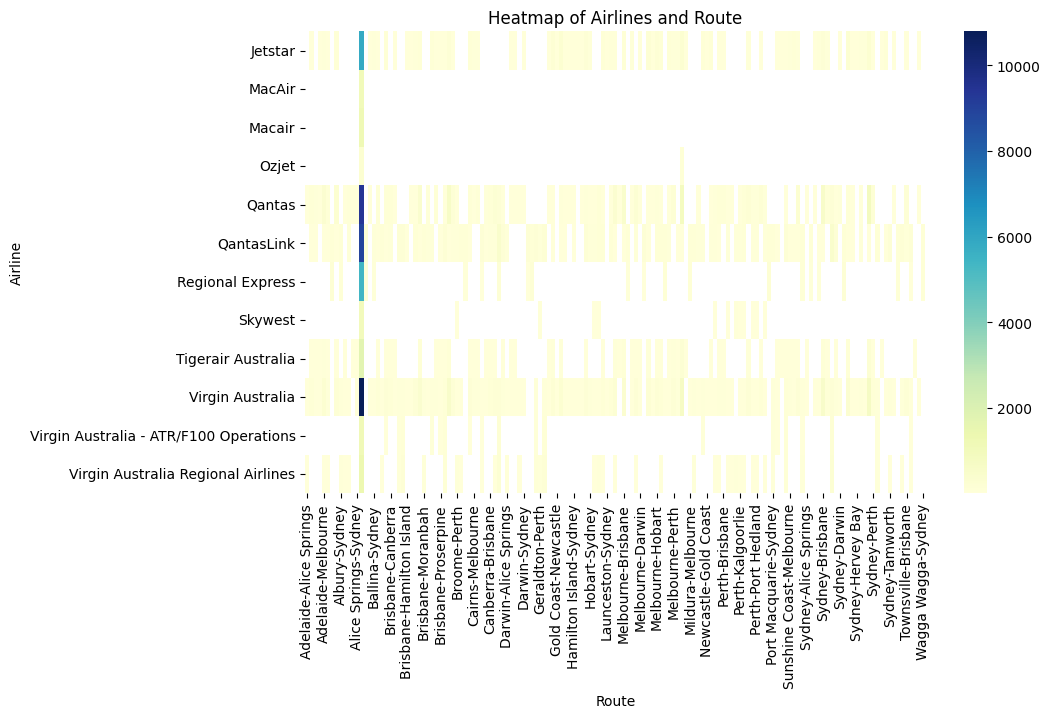

In [11]:
# prompt: Make me heatmap for Airlines and route

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the Airlines and Route columns
plt.figure(figsize=(10, 6))
sns.heatmap(filtered.pivot_table(index='Airline', columns='Route', values='Sectors_Scheduled', aggfunc='mean'), cmap='YlGnBu')
plt.title('Heatmap of Airlines and Route')
plt.xlabel('Route')
plt.ylabel('Airline')
plt.show()


In [28]:
# Import necessary libraries
import pandas as pd
from scipy.stats import ttest_rel, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = filtered  # Assuming df is your DataFrame containing the necessary columns

# **Research Question 1:** Is there a significant difference in on-time arrival performance between pre-COVID and post-COVID periods?

# Preprocess the data
pre_covid_data = data[data['Month'] < '2020-03']
post_covid_data = data[data['Month'] >= '2020-03']

# Ensure that both datasets have the same number of observations
min_length = min(len(pre_covid_data), len(post_covid_data))
pre_covid_data = pre_covid_data[:min_length]
post_covid_data = post_covid_data[:min_length]

# Perform paired samples t-test
t_statistic, p_value = ttest_rel(pre_covid_data['Arrivals_On_Time'], post_covid_data['Arrivals_On_Time'])

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in on-time arrival performance between pre-COVID and post-COVID periods.")
else:
    print("There is no significant difference in on-time arrival performance between pre-COVID and post-COVID periods.")

# **Research Question 2:** Is there a significant difference in flight cancellation rates among different airlines?

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(data[data['Airline'] == 'Qantas']['Cancellations'],
                                 data[data['Airline'] == 'Jetstar']['Cancellations'],
                                 data[data['Airline'] == 'Virgin Australia']['Cancellations'])

# Interpret the results
if p_value < 0.05:
    print("\nThere is a significant difference in flight cancellation rates among different airlines.")
else:
    print("\nThere is no significant difference in flight cancellation rates among different airlines.")

top_airlines_cancellations = data.groupby('Airline').agg({'Cancellations': lambda x: (x.sum() / len(data)) * 100}).sort_values(by='Cancellations', ascending=False).head(5)

# Format the percentages for better readability
top_airlines_cancellations['Cancellations'] = top_airlines_cancellations['Cancellations'].apply(lambda x: f"{x:.2f}%")

print(top_airlines_cancellations)


# **Research Question 3:** Can we predict flight delays using historical data and other factors such as airline, route, and month?

# Preprocess the data
X = data[['Airline', 'Route', 'Month']]  # Features
y = data['Departures_Delayed']  # Target variable

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("\nMean squared error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("\nR-squared:", r_squared)

# Interpret the results
# Analyze the model coefficients to understand the impact of different factors on flight delays
# Use the model to make predictions on new data


There is no significant difference in on-time arrival performance between pre-COVID and post-COVID periods.

There is no significant difference in flight cancellation rates among different airlines.
                 Cancellations
Airline                       
Virgin Australia       122.75%
QantasLink              91.77%
Qantas                  91.68%
Jetstar                 68.32%
Regional Express        18.12%

Mean squared error: 12982.202639893922

R-squared: 0.6266889724143543


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
data = filtered
# Make a copy of the DataFrame to avoid modifying the original data
data_copy = data.copy()

# Assuming 'data_copy' is your DataFrame containing the necessary columns including 'Month' and 'On_Time_Arrivals'

# Convert 'Month' column to datetime if it's not already in datetime format
data_copy['Month'] = pd.to_datetime(data_copy['Month'], format='%b-%y')

# Group data by month and calculate mean on-time arrival rate for each month
monthly_performance = data_copy.groupby(pd.Grouper(key='Month', freq='M'))['Arrivals_On_Time'].mean()

# Perform linear regression to determine the slope of the trend line
slope, intercept, r_value, p_value, std_err = linregress(range(len(monthly_performance)), monthly_performance)

# Interpret the results
if slope > 0:
    print("Flight performance has improved over time.")
elif slope < 0:
    print("Flight performance has declined over time.")
else:
    print("There is no significant change in flight performance over time.")



Flight performance has declined over time.
